<a href="https://colab.research.google.com/github/eireford/ConwayLifeTensorFlow/blob/master/LTF_conv2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Life on TensorFlow
TensorFlow convolution layer with

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time

In [0]:
def default_config():
  return { 
      'grid_shape':  [2048,2048],
      # for reproducability reuse seed
      'seed': 1000,
      'preferred_size_inches': 18
   }

In [0]:
def random_uniform_grid(shape,seed):
  return tf.round(tf.random.uniform(shape=shape,dtype=tf.float32, seed=seed))

Use the default configuration and generate a grid of cells, randomly alive or dead.

In [0]:
config = default_config()
grid_shape, seed, preferred_size_inches, = config.values()
grid = random_uniform_grid(grid_shape,seed)

Display the grid

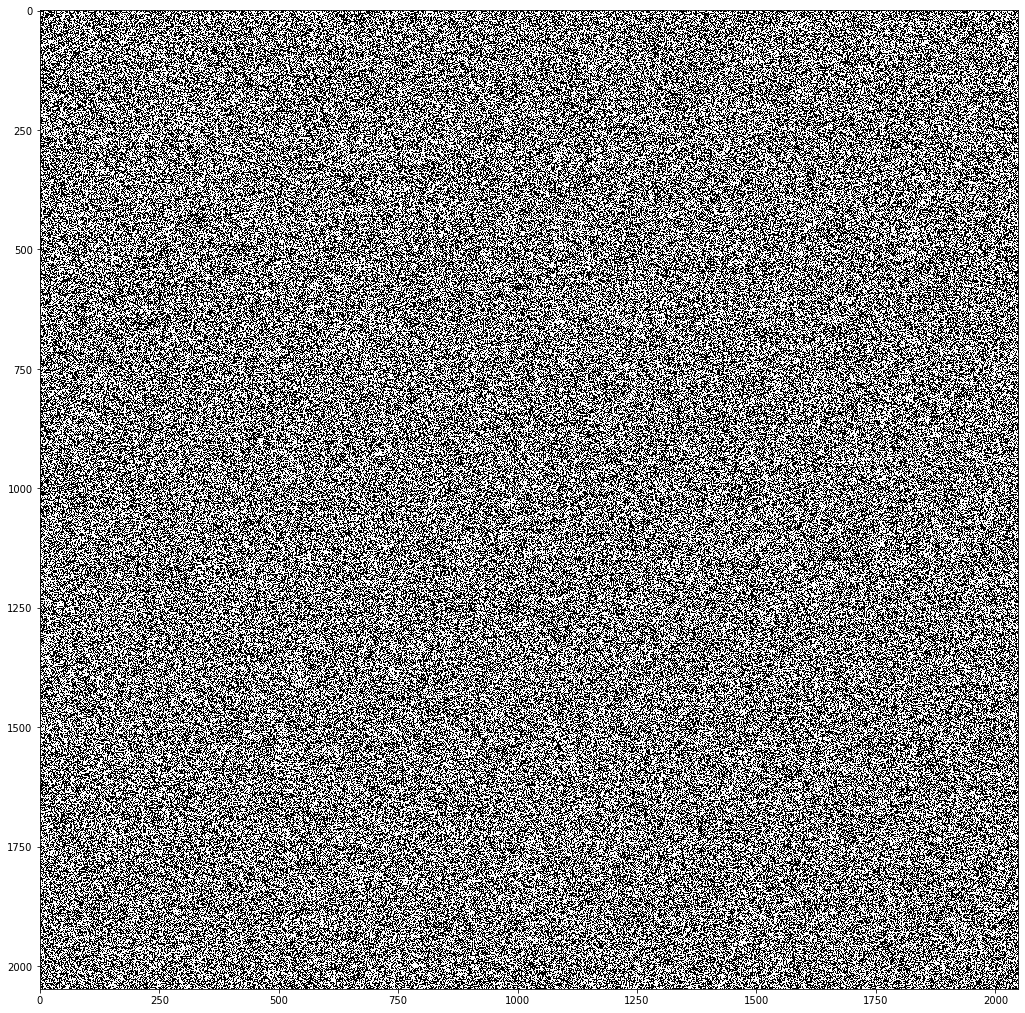

In [0]:
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
figure_1 = plt.imshow(grid,cmap='Greys',origin='upper',interpolation='nearest')

In [0]:
alive_total = tf.reduce_sum(grid)
ratio_alive = alive_total/(grid_shape[0]*grid_shape[1])
print("alive_total",int(alive_total))
print("alive_percent",float(ratio_alive*100))

alive_total 2096521
alive_percent 49.984954833984375


In [0]:
livable_filter = tf.constant([
                                [1,1,1],
                                [1,10,1],
                                [1,1,1]
                                ],dtype=tf.float32,name='neighbors_filter')
def convolve_for_density(x):
  kernal = tf.reshape(livable_filter, [3,3,1,1], name='kernel')
  image = tf.reshape(x,[1,grid_shape[0],grid_shape[1],1], name='image')
  denisty_map = tf.reshape(tf.nn.conv2d(image,kernal,[1,1,1,1],"SAME"),grid_shape)
  return denisty_map  

In [0]:
def liveness_test(x):
  return tf.cast(tf.where(((x == 3)|(x == 12)|(x == 13)),1,0),dtype=tf.float32)

In [0]:
def population_report(x):
  alive_total = tf.reduce_sum(x)
  ratio_alive = alive_total/(grid_shape[0]*grid_shape[1])
  return "alive_total:" + str(int(alive_total)) + " alive_percent:" + str(float(ratio_alive*100))

In [0]:
def run(running_state,iterations = 20): 
  for i in range(iterations):
    if i%(iterations//20) == 0:
      print("step:",i,population_report(running_state))
    running_state = convolve_for_density(running_state)
    running_state = liveness_test(running_state)
  return running_state

In [0]:
%time final_state = run(grid,20000)

step: 0 alive_total:2096521 alive_percent:49.984954833984375
step: 1000 alive_total:180327 alive_percent:4.299330711364746
step: 2000 alive_total:148077 alive_percent:3.530430793762207
step: 3000 alive_total:138744 alive_percent:3.3079147338867188
step: 4000 alive_total:130831 alive_percent:3.1192541122436523
step: 5000 alive_total:125736 alive_percent:2.9977798461914062
step: 6000 alive_total:124674 alive_percent:2.9724597930908203
step: 7000 alive_total:122862 alive_percent:2.929258346557617
step: 8000 alive_total:121485 alive_percent:2.896428108215332
step: 9000 alive_total:121180 alive_percent:2.8891563415527344
step: 10000 alive_total:121176 alive_percent:2.8890609741210938
step: 11000 alive_total:121168 alive_percent:2.8888702392578125
step: 12000 alive_total:121180 alive_percent:2.8891563415527344
step: 13000 alive_total:121176 alive_percent:2.8890609741210938
step: 14000 alive_total:121168 alive_percent:2.8888702392578125
step: 15000 alive_total:121180 alive_percent:2.889156341

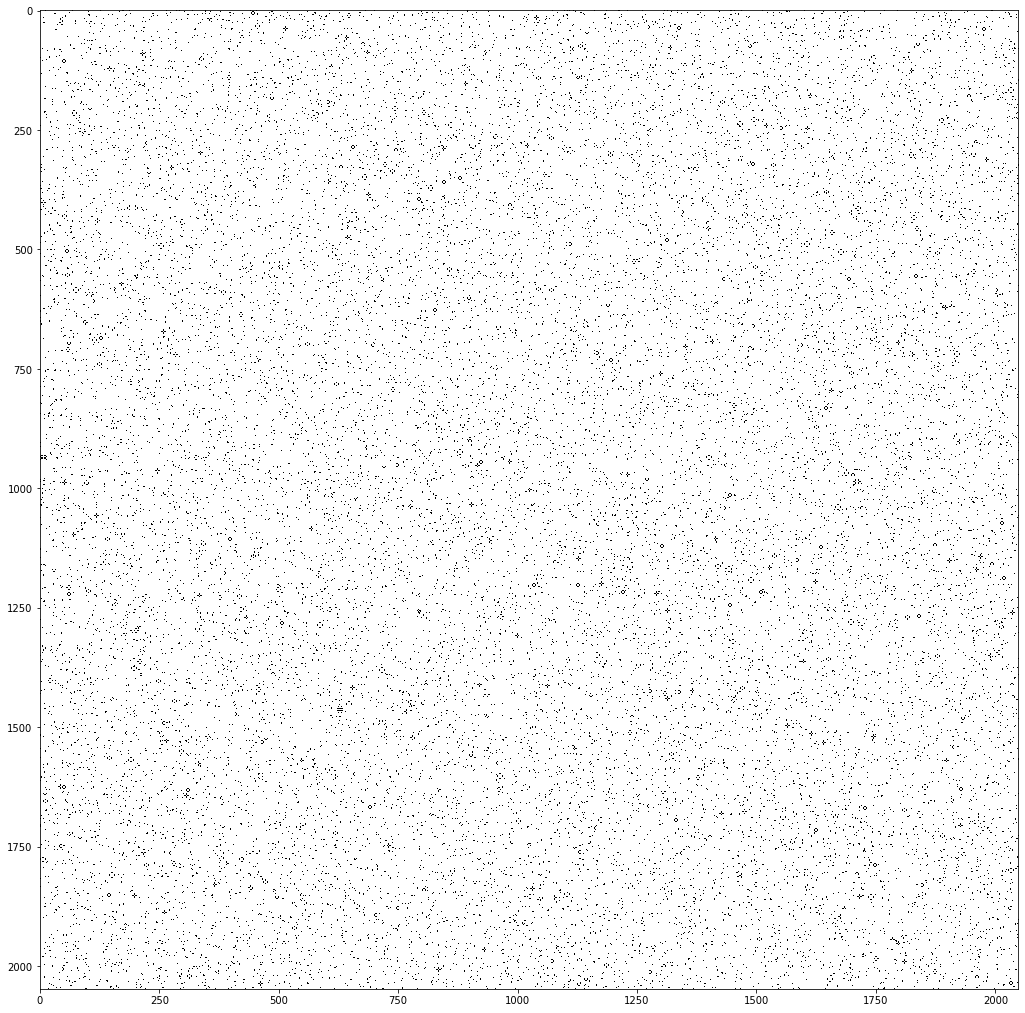

In [0]:
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
figure_3 = plt.imshow(final_state,cmap='Greys',origin='upper',interpolation='nearest') 

In [0]:
%time final_state = run(final_state)

step: 0 alive_total:121168 alive_percent:2.8888702392578125
step: 1 alive_total:121192 alive_percent:2.8894424438476562
step: 2 alive_total:121176 alive_percent:2.8890609741210938
step: 3 alive_total:121180 alive_percent:2.8891563415527344
step: 4 alive_total:121180 alive_percent:2.8891563415527344
step: 5 alive_total:121188 alive_percent:2.8893470764160156
step: 6 alive_total:121168 alive_percent:2.8888702392578125
step: 7 alive_total:121192 alive_percent:2.8894424438476562
step: 8 alive_total:121176 alive_percent:2.8890609741210938
step: 9 alive_total:121180 alive_percent:2.8891563415527344
step: 10 alive_total:121180 alive_percent:2.8891563415527344
step: 11 alive_total:121188 alive_percent:2.8893470764160156
step: 12 alive_total:121168 alive_percent:2.8888702392578125
step: 13 alive_total:121192 alive_percent:2.8894424438476562
step: 14 alive_total:121176 alive_percent:2.8890609741210938
step: 15 alive_total:121180 alive_percent:2.8891563415527344
step: 16 alive_total:121180 alive_

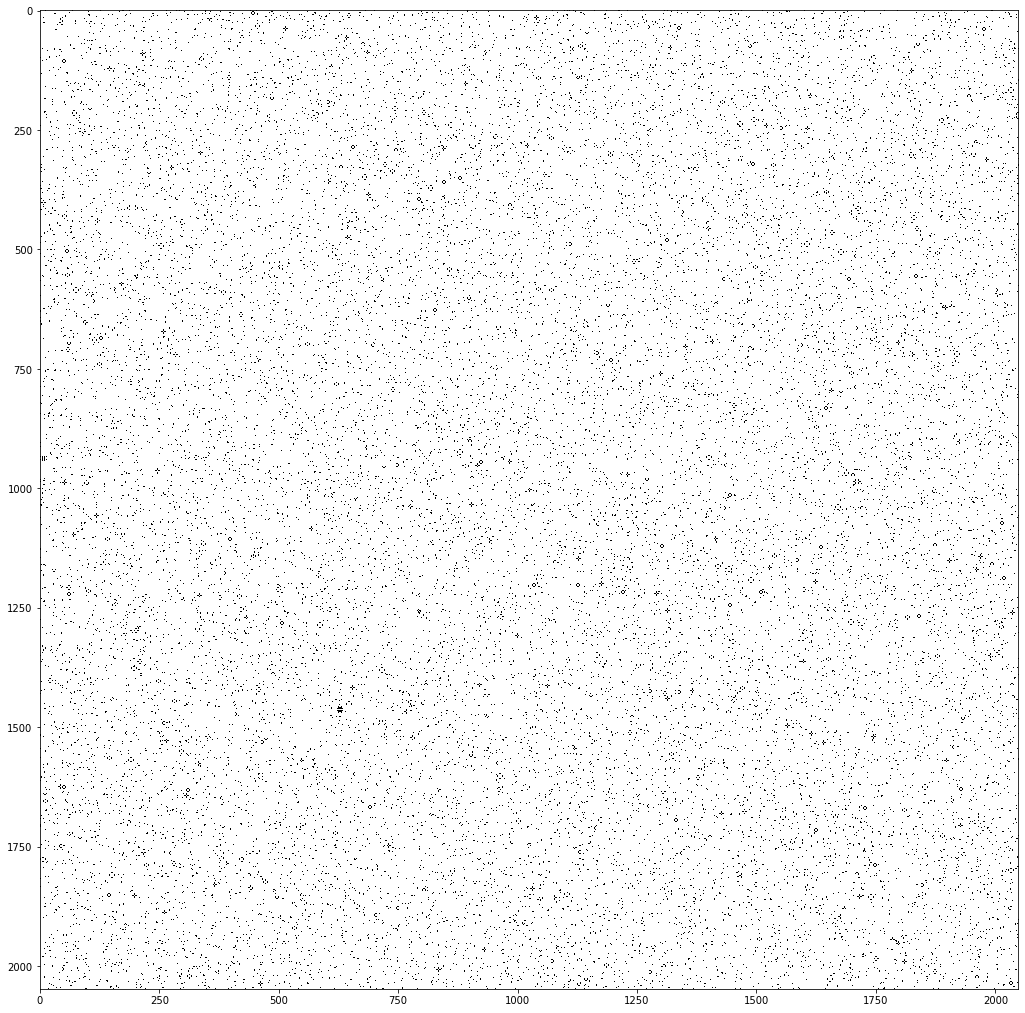

In [0]:
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
figure_3 = plt.imshow(final_state,cmap='Greys',origin='upper',interpolation='nearest') 

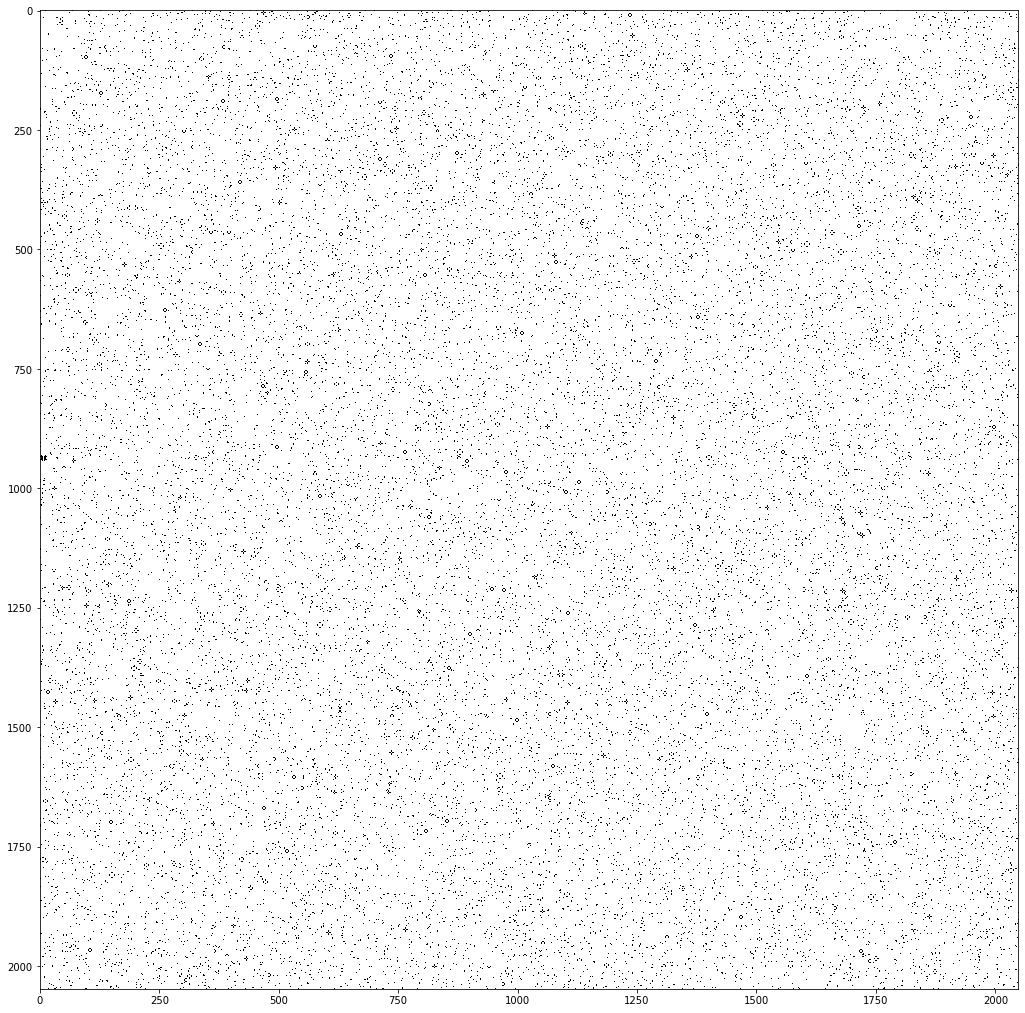

In [0]:
final_state = convolve_for_density(final_state)
final_state = liveness_test(final_state)
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
figure_600 = plt.imshow(final_state,cmap='Greys',origin='upper',interpolation='nearest')

Credits
 - https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
 - https://nostarch.com/download/samples/PythonPlayground_sampleCh3.pdf
 - https://databricks.com/tensorflow/custom-functions
 - http://drsfenner.org/blog/2015/07/game-of-life-in-numpy-preliminaries-2/